In [ ]:
# Select the first 200 records from the dataframe
df_sample = df.head(200)

# Save the sample to a CSV file
df_sample.to_csv('.csv', index=False)

In [2]:
df.head()

,Date of departure,Train number,Relation,Departure line,Actual arrival time,Actual departure time,Planned arrival time,Planned departure time,Delay at arrival,Delay at departure,Relation direction,Stopping place (FR),Start Station (FR),End Station (FR)
0,01MAY2025,1995,L B1-2,27,NaN,23:59:50,NaN,23:58:00,NaN,110.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-CENTRAAL,ANTWERPEN-CENTRAAL,NIVELLES
1,01MAY2025,1995,L B1-2,27,0:03:07,0:04:15,0:02:00,0:03:00,67.0,75.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,ANTWERPEN-BERCHEM,ANTWERPEN-CENTRAAL,NIVELLES
2,01MAY2025,1995,L B1-2,27,0:06:52,0:07:36,0:06:00,0:06:00,102.0,96.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL,ANTWERPEN-CENTRAAL,NIVELLES
3,01MAY2025,1995,L B1-2,27,0:11:00,0:11:53,0:10:00,0:10:00,110.0,113.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,MORTSEL-LIERSESTEENWEG,ANTWERPEN-CENTRAAL,NIVELLES
4,01MAY2025,1995,L B1-2,27,0:14:09,0:14:53,0:13:00,0:14:00,69.0,53.0,L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES,HOVE,ANTWERPEN-CENTRAAL,NIVELLES


In [3]:
df.columns

Index(['Date of departure', 'Train number', 'Relation', 'Departure line',
       'Actual arrival time', 'Actual departure time', 'Planned arrival time',
       'Planned departure time', 'Delay at arrival', 'Delay at departure',
       'Relation direction', 'Stopping place (FR)', 'Start Station (FR)',
       'End Station (FR)'],
      dtype='object')

/tmp/ipykernel_331124/1593403973.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[DEPARTURE_COL] = pd.to_datetime(df[DEPARTURE_COL], errors='coerce')
/tmp/ipykernel_331124/1593403973.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[ARRIVAL_COL] = pd.to_datetime(df[ARRIVAL_COL], errors='coerce')


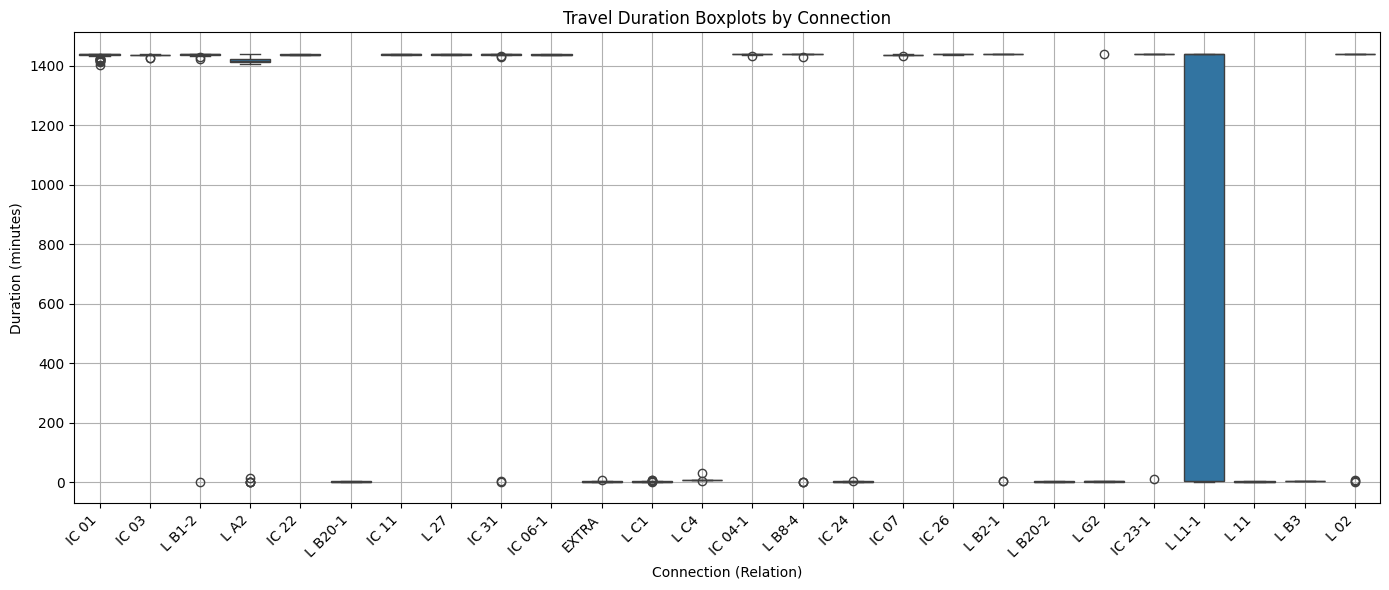

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== USER SETUP SECTION =====
DATA_PATH = "df_monthly_with_headers.csv"
CONNECTION_COL = "Relation"
DEPARTURE_COL = "Actual departure time"
ARRIVAL_COL = "Actual arrival time"

# Load and preprocess data
df = pd.read_csv(DATA_PATH)
df[DEPARTURE_COL] = pd.to_datetime(df[DEPARTURE_COL], errors='coerce')
df[ARRIVAL_COL] = pd.to_datetime(df[ARRIVAL_COL], errors='coerce')

# Drop rows with invalid datetimes
df = df.dropna(subset=[DEPARTURE_COL, ARRIVAL_COL])

# Compute travel duration in minutes
df["duration_minutes"] = (df[ARRIVAL_COL] - df[DEPARTURE_COL]).dt.total_seconds() / 60

# Drop extreme outliers and negative durations (optional)
df = df[df["duration_minutes"] > 0]

# Filter to connections with at least some data
group_sizes = df[CONNECTION_COL].value_counts()
valid_connections = group_sizes[group_sizes >= 5].index.tolist()  # Only show if >= 5 samples
filtered_df = df[df[CONNECTION_COL].isin(valid_connections)]

# Plot boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=filtered_df,
    x=CONNECTION_COL,
    y="duration_minutes",
    showfliers=True
)
plt.title("Travel Duration Boxplots by Connection")
plt.xlabel("Connection (Relation)")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [3]:
df.columns

Index(['Date of departure', 'Train number', 'Relation', 'Departure line',
       'Actual arrival time', 'Actual departure time', 'Planned arrival time',
       'Planned departure time', 'Delay at arrival', 'Delay at departure',
       'Relation direction', 'Stopping place (FR)', 'Start Station (FR)',
       'End Station (FR)', 'duration_minutes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 30 to 63
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date of departure       2 non-null      object        
 1   Train number            2 non-null      int64         
 2   Relation                2 non-null      object        
 3   Departure line          2 non-null      object        
 4   Actual arrival time     2 non-null      datetime64[ns]
 5   Actual departure time   2 non-null      datetime64[ns]
 6   Planned arrival time    2 non-null      object        
 7   Planned departure time  2 non-null      object        
 8   Delay at arrival        2 non-null      float64       
 9   Delay at departure      2 non-null      float64       
 10  Relation direction      2 non-null      object        
 11  Stopping place (FR)     2 non-null      object        
 12  Start Station (FR)      2 non-null      object        
 1

/tmp/ipykernel_13466/3968039147.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


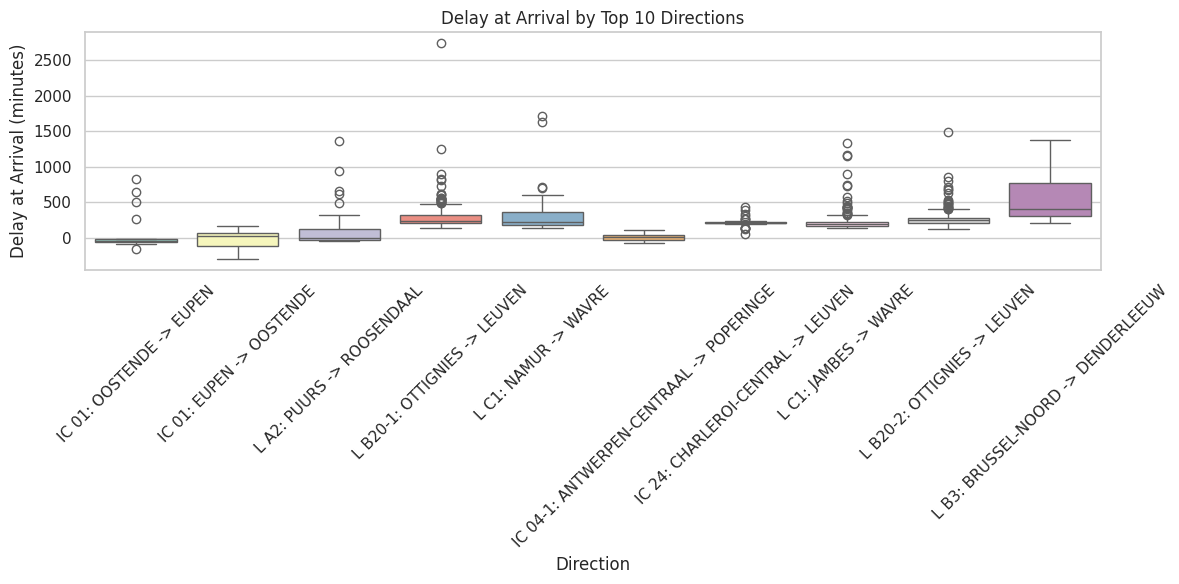

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Get the top 10 most frequent directions
top_directions = df['Relation direction'].value_counts().nlargest(10).index

# Step 2: Filter the dataframe
filtered_df = df[df['Relation direction'].isin(top_directions)]

# Step 3: Set up the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Step 4: Create boxplot
sns.boxplot(
    x='Relation direction',
    y='Delay at arrival',  # Change to 'Delay at departure' if needed
    data=filtered_df,
    palette='Set3'
)

# Customize plot
plt.title('Delay at Arrival by Top 10 Directions')
plt.xlabel('Direction')
plt.ylabel('Delay at Arrival (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# STEP 1: Create the multi-select widget for direction selection
directions = sorted(df['Relation direction'].dropna().unique())
direction_selector = widgets.SelectMultiple(
    options=directions,
    value=directions[:3],  # pre-select first 3, you can change this
    description='Direction:',
    layout=widgets.Layout(width='50%'),
    style={'description_width': 'initial'}
)

# STEP 2: Define the update function
def update_plot(selected_directions):
    if not selected_directions:
        print("Please select at least one direction.")
        return
    
    # Filter the DataFrame
    filtered_df = df[df['Relation direction'].isin(selected_directions)]
    
    # Create the Plotly boxplot
    fig = px.box(
        filtered_df,
        x='Relation direction',
        y='Delay at arrival',  # You can switch to 'Delay at departure'
        title='🚦 Delay at Arrival by Direction',
        labels={'Delay at arrival': 'Delay (minutes)', 'Relation direction': 'Direction'},
        points='outliers',  # show outliers
        color='Relation direction'  # color per direction
    )
    
    fig.update_layout(showlegend=False)
    fig.show()

# STEP 3: Link widget to plotting function
widgets.interact(update_plot, selected_directions=direction_selector)


interactive(children=(SelectMultiple(description='Direction:', index=(0, 1, 2), layout=Layout(width='50%'), op…

<function __main__.update_plot(selected_directions)>

In [14]:
df.columns

Index(['Date of departure', 'Train number', 'Relation', 'Departure line',
       'Actual arrival time', 'Actual departure time', 'Planned arrival time',
       'Planned departure time', 'Delay at arrival', 'Delay at departure',
       'Relation direction', 'Stopping place (FR)', 'Start Station (FR)',
       'End Station (FR)', 'duration_minutes'],
      dtype='object')

In [17]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Load data
df = pd.read_csv("df_monthly_with_headers.csv")

# Clean and prepare
df["Delay at arrival"] = pd.to_numeric(df["Delay at arrival"], errors="coerce").fillna(0)
df["Delay at departure"] = pd.to_numeric(df["Delay at departure"], errors="coerce").fillna(0)
df["Stopping place (FR)"] = df["Stopping place (FR)"].astype(str).str.title()
df["Total Delay"] = df["Delay at arrival"] + df["Delay at departure"]

# Unique stations
stations = sorted(df['Stopping place (FR)'].dropna().unique())
station_selector = widgets.SelectMultiple(
    options=stations,
    value=stations[:5],
    description='Stations:',
    layout=widgets.Layout(width='60%'),
    style={'description_width': 'initial'}
)

# Plot function
def update_plot(selected_stations):
    if not selected_stations:
        print("Please select at least one station.")
        return
    
    filtered_df = df[df['Stopping place (FR)'].isin(selected_stations)]
    
    fig = px.box(
        filtered_df,
        x='Stopping place (FR)',
        y='Total Delay',
        title='📍 Total Delay Distribution by Stopping Place',
        labels={'Total Delay': 'Total Delay (minutes)', 'Stopping place (FR)': 'Station'},
        points='outliers',
        color='Stopping place (FR)'
    )
    fig.update_layout(
        showlegend=False,
        yaxis=dict(range=[0, 1000])  # Set Y-axis range
    )
    fig.show()

# Link widget to plot
widgets.interact(update_plot, selected_stations=station_selector)


interactive(children=(SelectMultiple(description='Stations:', index=(0, 1, 2, 3, 4), layout=Layout(width='60%'…

<function __main__.update_plot(selected_stations)>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1717 entries, 30 to 1917993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date of departure       1717 non-null   object        
 1   Train number            1717 non-null   int64         
 2   Relation                1717 non-null   object        
 3   Departure line          1716 non-null   object        
 4   Actual arrival time     1717 non-null   datetime64[ns]
 5   Actual departure time   1717 non-null   datetime64[ns]
 6   Planned arrival time    1717 non-null   object        
 7   Planned departure time  1717 non-null   object        
 8   Delay at arrival        1717 non-null   float64       
 9   Delay at departure      1717 non-null   float64       
 10  Relation direction      1689 non-null   object        
 11  Stopping place (FR)     1717 non-null   object        
 12  Start Station (FR)      1689 non-null   object   

In [3]:
from pyspark.sql import SparkSession

spark= SparkSession.builder.appName("VCE Analysis").getOrCreate()
df= spark.read.csv("df_monthly_with_headers.csv", header=True, inferSchema=True)
df.show()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/07/15 11:41:59 WARN Utils: Your hostname, learner-HP-EliteBook-850-G5, resolves to a loopback address: 127.0.1.1; using 10.10.206.217 instead (on interface wlp1s0)
25/07/15 11:41:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/07/15 11:42:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-----------------+------------+--------+--------------+-------------------+---------------------+--------------------+----------------------+----------------+------------------+--------------------+--------------------+------------------+----------------+
|Date of departure|Train number|Relation|Departure line|Actual arrival time|Actual departure time|Planned arrival time|Planned departure time|Delay at arrival|Delay at departure|  Relation direction| Stopping place (FR)|Start Station (FR)|End Station (FR)|
+-----------------+------------+--------+--------------+-------------------+---------------------+--------------------+----------------------+----------------+------------------+--------------------+--------------------+------------------+----------------+
|        01MAY2025|        1995|  L B1-2|            27|               NULL|  2025-07-15 23:59:50|                NULL|   2025-07-15 23:58:00|            NULL|             110.0|L B1-2: ANTWERPEN...|  ANTWERPEN-CENTRAAL|ANTWERPEN

In [9]:
from pyspark.sql import functions as F

# Get the last 10 rows where Relation == "L B1-2"
filtered_df = df.filter(df["Relation"] == "L B1-2")
count = filtered_df.count()
if count > 10:
    filtered_df.orderBy(F.monotonically_increasing_id().desc()).limit(10).orderBy(F.monotonically_increasing_id()).show()
else:
    filtered_df.show()

+-----------------+------------+--------+--------------+-------------------+---------------------+--------------------+----------------------+----------------+------------------+--------------------+--------------------+------------------+------------------+
|Date of departure|Train number|Relation|Departure line|Actual arrival time|Actual departure time|Planned arrival time|Planned departure time|Delay at arrival|Delay at departure|  Relation direction| Stopping place (FR)|Start Station (FR)|  End Station (FR)|
+-----------------+------------+--------+--------------+-------------------+---------------------+--------------------+----------------------+----------------+------------------+--------------------+--------------------+------------------+------------------+
|        31MAY2025|        1973|  L B1-2|          NULL|2025-07-15 01:01:10|                 NULL| 2025-07-15 01:02:00|                  NULL|           -49.0|              NULL|L B1-2: NIVELLES ...|  ANTWERPEN-CENTRAAL|   

In [8]:
df.filter(df["Relation"] == "L B1-2").show(-10)

+-----------------+------------+--------+--------------+-------------------+---------------------+--------------------+----------------------+----------------+------------------+------------------+-------------------+------------------+----------------+
|Date of departure|Train number|Relation|Departure line|Actual arrival time|Actual departure time|Planned arrival time|Planned departure time|Delay at arrival|Delay at departure|Relation direction|Stopping place (FR)|Start Station (FR)|End Station (FR)|
+-----------------+------------+--------+--------------+-------------------+---------------------+--------------------+----------------------+----------------+------------------+------------------+-------------------+------------------+----------------+
+-----------------+------------+--------+--------------+-------------------+---------------------+--------------------+----------------------+----------------+------------------+------------------+-------------------+------------------+--

In [5]:
df.columns

['Date of departure',
 'Train number',
 'Relation',
 'Departure line',
 'Actual arrival time',
 'Actual departure time',
 'Planned arrival time',
 'Planned departure time',
 'Delay at arrival',
 'Delay at departure',
 'Relation direction',
 'Stopping place (FR)',
 'Start Station (FR)',
 'End Station (FR)']

In [ ]:
df.head(5)

[Row(Date of departure='01MAY2025', Train number=1995, Relation='L B1-2', Departure line='27', Actual arrival time=None, Actual departure time=datetime.datetime(2025, 7, 15, 23, 59, 50), Planned arrival time=None, Planned departure time=datetime.datetime(2025, 7, 15, 23, 58), Delay at arrival=None, Delay at departure=110.0, Relation direction='L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES', Stopping place (FR)='ANTWERPEN-CENTRAAL', Start Station (FR)='ANTWERPEN-CENTRAAL', End Station (FR)='NIVELLES'),
 Row(Date of departure='01MAY2025', Train number=1995, Relation='L B1-2', Departure line='27', Actual arrival time=datetime.datetime(2025, 7, 15, 0, 3, 7), Actual departure time=datetime.datetime(2025, 7, 15, 0, 4, 15), Planned arrival time=datetime.datetime(2025, 7, 15, 0, 2), Planned departure time=datetime.datetime(2025, 7, 15, 0, 3), Delay at arrival=67.0, Delay at departure=75.0, Relation direction='L B1-2: ANTWERPEN-CENTRAAL -> NIVELLES', Stopping place (FR)='ANTWERPEN-BERCHEM', Start Stat

In [ ]:
import os
MART_PATH = os.getenv("MART_RELATIVE_PATH")
DELAY_PATH = "/home/learner/Desktop/internship/Dealy_analysis/tempocom_mart/public/delays_standardized_titlecase.csv"


DELAY_PATH

'None/public/delays_standardized_titlecase.csv'

In [9]:
from pyspark.sql import SparkSession

# Make sure MART_PATH is defined before this cell


spark = SparkSession.builder.appName("VCE Analysis").getOrCreate()
df_delay = spark.read.csv(DELAY_PATH, header=True, inferSchema=True)
df_delay.show(5)

25/07/16 09:16:14 WARN FileStreamSink: Assume no metadata directory. Error while looking for metadata directory in the path: None/public/delays_standardized_titlecase.csv.
java.io.FileNotFoundException: File None/public/delays_standardized_titlecase.csv does not exist
	at org.apache.hadoop.fs.RawLocalFileSystem.deprecatedGetFileStatus(RawLocalFileSystem.java:917)
	at org.apache.hadoop.fs.RawLocalFileSystem.getFileLinkStatusInternal(RawLocalFileSystem.java:1238)
	at org.apache.hadoop.fs.RawLocalFileSystem.getFileStatus(RawLocalFileSystem.java:907)
	at org.apache.hadoop.fs.FilterFileSystem.getFileStatus(FilterFileSystem.java:462)
	at org.apache.spark.sql.execution.streaming.FileStreamSink$.hasMetadata(FileStreamSink.scala:56)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:381)
	at org.apache.spark.sql.catalyst.analysis.ResolveDataSource.org$apache$spark$sql$catalyst$analysis$ResolveDataSource$$loadV1BatchSource(ResolveDataSource.scala:143)
	at 

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/home/learner/Desktop/internship/Dealy_analysis/tempocom-app/None/public/delays_standardized_titlecase.csv. SQLSTATE: 42K03